In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [46]:
x = np.random.uniform(-3,3,100)

In [47]:
X = x.reshape(-1,1)

In [48]:
y = 0.5*(x**2)+x + 2 + np.random.normal(0,1,100)

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [31]:
def PolynomialRegression(degree=2):
    return Pipeline([
        ("poly",PolynomialFeatures(degree=degree)),
        ("std_scaler",StandardScaler()),
        ("lin_reg",LinearRegression())
    ])

In [32]:
poly_1 = PolynomialRegression(1)

In [33]:
poly_2 = PolynomialRegression(2)

In [34]:
poly_10 = PolynomialRegression(10)

In [18]:
from sklearn.model_selection import train_test_split

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [54]:
poly_1.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=1, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lin_reg',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [55]:
poly_1.score(X_test,y_test)

0.22944267820973807

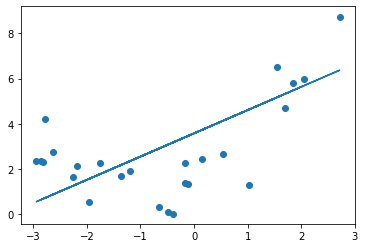

In [56]:
plt.scatter(X_test,y_test)
plt.plot(X_test,poly_1.predict(X_test))
plt.show()

In [57]:
poly_2.fit(X_train,y_train)
poly_2.score(X_test,y_test)

0.8003515084789017

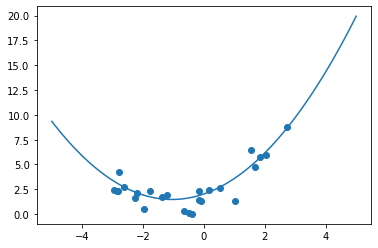

In [86]:
plt.scatter(X_test,y_test)
X_split = np.linspace(-5,5,100).reshape([-1,1])
y_predict = poly_2.predict(X_split)
plt.plot(X_split,poly_2.predict(X_split))
plt.show()

In [73]:
poly_10.fit(X_train,y_train)
poly_10.score(X_test,y_test)

0.7813773074879627

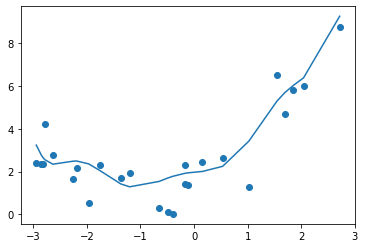

In [74]:
plt.scatter(X_test,y_test)
y_predict = poly_10.predict(X_test)
plt.plot(np.sort(X_test[:,0]),y_predict[np.argsort(X_test[:,0])])
plt.show()

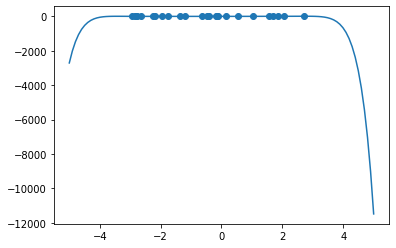

In [85]:
x_split = np.linspace(-5,5,100)
X_split = x_split.reshape([-1,1])
y_predict = poly_10.predict(X_split)
plt.scatter(X_test,y_test)
plt.plot(x_split,y_predict)
plt.show()

## 学习曲线

In [90]:
y.shape

(100,)

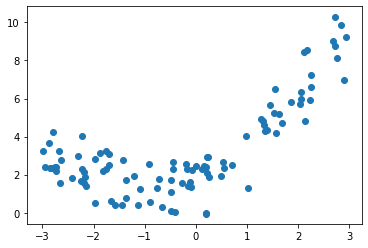

In [91]:
plt.scatter(x,y)

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [113]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [154]:
train_score = []
test_score = []
poly = PolynomialRegression(3)
for i in range(1,len(X_train)+1):
    X_train_cur = X_train[:i]
    y_train_cur = y_train[:i]
    poly.fit(X_train_cur,y_train_cur)
    
    y_train_predict = poly.predict(X_train_cur)
    y_test_predict = poly.predict(X_test)

    train_score.append(mean_squared_error(y_train_cur,y_train_predict))
    test_score.append(mean_squared_error(y_test,y_test_predict))

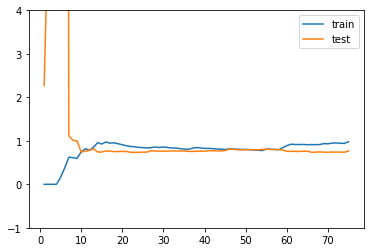

In [155]:
plt.plot(range(1,len(train_score)+1),np.sqrt(np.array(train_score)),label = 'train')
plt.plot(range(1,len(test_score)+1),np.sqrt(np.array(test_score)),label = 'test')
plt.legend()
plt.axis(ymin=-1,ymax=4)
plt.show()